In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
#importing data with latin-1 encoding because there are some special characters
df = pd.read_csv('Information.csv', encoding='latin-1')

In [3]:
#a sample of the dataset
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [5]:
df.shape

(20050, 26)

In [6]:
df['gender:confidence'].value_counts()

1.0000    13926
0.0000       71
0.6691       31
0.6709       30
0.6591       30
          ...  
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender:confidence, Length: 923, dtype: int64

Only 13926 gender categories are with 100% confidence. So for the prediction of genders we will be using only the ones with 100% confidence  

In [7]:
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

We will only consider male, female and brand categories as unknown is lesser in count and doesnt provide much inofrmation at the same time.

# Data Analysis

## 1. Link_Color and Sidebar_Color Features Exploration

Exploring the features sidebar color and link color for the three gender categories male, female and brand

In [8]:
# Defining the function to return values from link_color and sidebar_color for each gender category
def plot_color_features(data, feature, toRemove):
    # Selecting columns from the data
    df_col = df.loc[:, ['gender:confidence', 'gender', feature]]
    
    # Selecting rows where gender:confidence >= 1 and removing values like 7.60E+42
    dfcolFiltered = df_col[(df_col['gender:confidence'] >= 1) &
                         ((df_col[feature]).str.contains('E\+') != True)]
    
    # Segregating data based on the gender category
    Male_data = dfcolFiltered[dfcolFiltered['gender'] == 'male']
    Female_data = dfcolFiltered[dfcolFiltered['gender'] == 'female']
    Brand_data = dfcolFiltered[dfcolFiltered['gender'] == 'brand']
    
    # To plot the graph, I need top 20 colors along with its count for each gender category
    color_male = Male_data[feature]
    color_female = Female_data[feature]
    color_brand = Brand_data[feature]
    
    # Creating list of lists by using flatten method
    male_list = list(color_male.values.flatten())
    female_list = list(color_female.values.flatten())
    brand_list = list(color_brand.values.flatten())
    
    # Only Selecting top 20 colors used by each gender and creating a list which includes the color and the count
    color_male = Counter(color_male).most_common(21)
    color_female = Counter(color_female).most_common(21)
    color_brand = Counter(color_brand).most_common(21)
    
    # Taking list of colors for each gender category
    # Not selecting the first most common color from each of the gender category
    male_colors = [x[0] for x in color_male[toRemove:]] 
    female_colors = [x[0] for x in color_female[toRemove:]] 
    brand_colors = [x[0] for x in color_brand[toRemove:]]
    
    # Taking list of counts for each gender category
    # Not Selecting the first most common number because the most common color is blue for all the categories and it doesnt give much value
    male_num = [x[1] for x in color_male[toRemove:]] 
    female_num = [x[1] for x in color_female[toRemove:]] 
    brand_num = [x[1] for x in color_brand[toRemove:]]
    
    # Converting hex codes into consistent format
    # 1. Prefixing hex code with # and adding six zeros to it
    # 2. Selecting 6 characters from the newly converted hex code
    Hexcolor_Male = ['#' + x + '000000' for x in male_colors]
    Hexcolor_Male = [x[0:7] for x in Hexcolor_Male]
    Hexcolor_Female = ['#' + x + '000000' for x in female_colors]
    Hexcolor_Female = [x[0:7] for x in Hexcolor_Female]
    Hexcolor_Brand = ['#' + x + '000000' for x in brand_colors]
    Hexcolor_Brand = [x[0:7] for x in Hexcolor_Brand]
    
    return male_num, female_num, brand_num, Hexcolor_Male, Hexcolor_Female, Hexcolor_Brand

### A. Exploring link_color attribute for each of the gender category

In [9]:
# calling function plot_color_features and removing 1 most common occuring color from each category
male_num, female_num, brand_num, Hexcolor_Male, Hexcolor_Female, Hexcolor_Brand = plot_color_features(df, 'link_color', 1)

In [10]:
col_range = list(range(len(male_num)))

#### Plotting the graph of the link_color for the Male gender

Text(0.5, 1.0, 'Link Colors which Male gender prefer ')

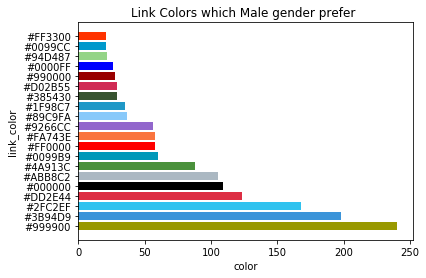

In [11]:
plt.barh(col_range,male_num,
                label = 'Male', color = Hexcolor_Male)
plt.yticks(col_range, Hexcolor_Male)
plt.xlabel('color')
plt.ylabel('link_color')
plt. title('Link Colors which Male gender prefer ')

#### Plotting the graph of the link_color for the Female gender

Text(0.5, 1.0, 'Link Colors which Female gender prefer')

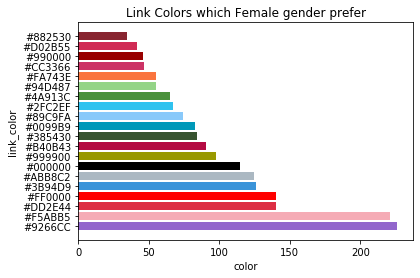

In [12]:
plt.barh(col_range,female_num,
                label = 'Female', color = Hexcolor_Female)
plt.yticks(col_range, Hexcolor_Female)
plt.xlabel('color')
plt.ylabel('link_color')
plt. title('Link Colors which Female gender prefer')

#### Plotting the graph of the link_color for the Brand gender

Text(0.5, 1.0, 'Link Colors which Brand gender prefer')

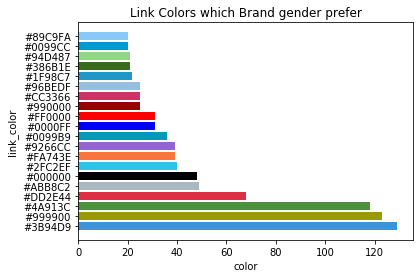

In [13]:
plt.barh(col_range,brand_num,
                label = 'Brand', color = Hexcolor_Brand)
plt.yticks(col_range, Hexcolor_Brand)
plt.xlabel('color')
plt.ylabel('link_color')
plt. title('Link Colors which Brand gender prefer')

### B. Exploring sidebar_color for each of the gender category

In [14]:
# calling function plot_color_features and removing 4 most common occuring color from each category
male_num_sc, female_num_sc, brand_num_sc, Hexcolor_Male_sc, Hexcolor_Female_sc, Hexcolor_Brand_sc = plot_color_features(df, 'sidebar_color', 4)

In [15]:
col_range_sc = list(range(len(male_num_sc)))

#### Plotting the graph of the side_color for the Male gender

Text(0.5, 1.0, 'Sidebar colors which Male gender prefer')

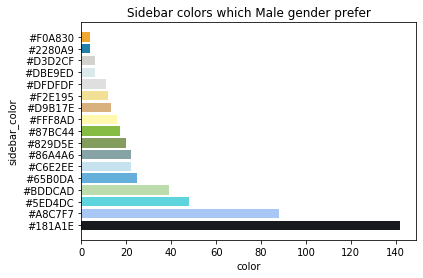

In [16]:
plt.barh(col_range_sc,male_num_sc,
                label = 'Male', color = Hexcolor_Male_sc)
plt.yticks(col_range_sc, Hexcolor_Male_sc)
plt.xlabel('color')
plt.ylabel('sidebar_color')
plt. title('Sidebar colors which Male gender prefer')

#### Plotting the graph of the sidebar_color for the Female gender

Text(0.5, 1.0, 'Sidebar colors which Female gender prefer')

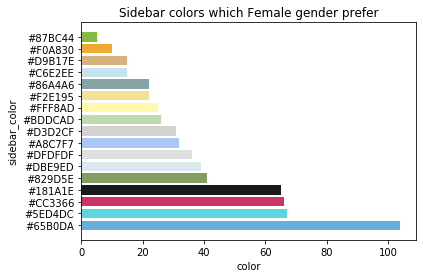

In [17]:
plt.barh(col_range_sc,female_num_sc,
                label = 'Female', color = Hexcolor_Female_sc)
plt.yticks(col_range_sc, Hexcolor_Female_sc)
plt.xlabel('color')
plt.ylabel('sidebar_color')
plt. title('Sidebar colors which Female gender prefer')

#### Plotting the graph of the sidebar_color for the Brand gender

Text(0.5, 1.0, 'Sidebar colors which Brand gender prefer')

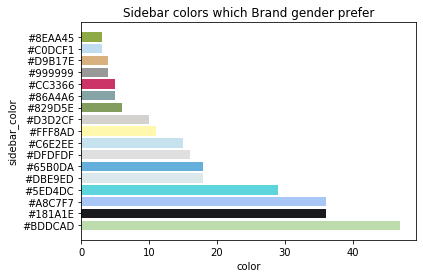

In [18]:
plt.barh(col_range_sc,brand_num_sc,
                label = 'Brand', color = Hexcolor_Brand_sc)
plt.yticks(col_range_sc, Hexcolor_Brand_sc)
plt.xlabel('color')
plt.ylabel('sidebar_color')
plt. title('Sidebar colors which Brand gender prefer')

#### Observations from the Colors Features exploration

</ol>
<li>Female prefer pink and purple as their link_color</li>
<li>Male prefer green and blue as their link_color</li>
<li>Brand prefer blue or green as their link_color</li>
<li>Users change link color more than the side bar color</li>
</ol>

## 2. Text and Description Features Exploration

Exploring which words are mostly used by each gender category (Male, Female and Brand).

Description field contains description of the user's profile. This field contains 3744 values as NaN (ie. Not a Number). It would cause problem while trying to clean 'description' field. Therefore changing NaN to blank (ie. '')

In [19]:
df.description = df.description.fillna('')

### Data Cleaning

In [20]:
import string
import re

In [21]:
def clean(s):
    s = str(s)        # Converting to string
    s = s.lower()     # Normalizing text by converting everything to lower case
    
    # Removing characters that are non-alphanumeric
    s = re.sub('https://t.co/\w+', ' ',s)
    s = re.sub('\s\W',' ',s) # Replacing one whitespace followed by one non-alphanumeric character with ' '
    s = re.sub('\W,\s', ' ', s) # Replacing one non-alphanumeric character  followed by comma and one whitespace with ' '
    s = re.sub("\d+",' ',s)     # Removing 1 or more digits
    s = re.sub('\s+', ' ', s)   # Removing 1 or more spaces from the text
    s = re.sub('[!#?$@_%]', ' ', s) # Removing !, @, #, $, _ from the string
    s = s.replace(',', ' ')
    s = s.replace('[\W*]', ' ')
    return s

In [22]:
df['text_normalized'] = [clean(text) for text in df['text']]
df['desc_normalized'] = [clean(desc) for desc in df['description']]

In [23]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

df['text_normalized']

0        robbie e responds to critics after win against eddie edwards in the worldtitleseries                             
1        ûïit felt like they were my friends and i was living the story with themû retired ian                         
2        i absolutely adore when louis starts the songs it hits me hard but it feels good                                 
3        hi jordanspieth looking at the url do you use ifttt   don't typically see an advanced user on the pgatour        
4        watching neighbours on sky+ catching up with the neighbs   xxx  ù÷ä ù÷ä ù÷ä ùôî ùè ùô ùè xxx                  
                                                      ...                                                                 
20045     lookupondeath ..fine  and i'll drink tea too. i love you.                                                       
20046    greg hardy you a good player and all but don't get in the face of dez bryant. learn your place mane.             
20047    you can

In [24]:
df[df['link_color'].str.contains('E\+') == True]['link_color'].shape

(34,)

In [25]:
# Putting all the interesting text together, 
# i.e. the profile description and the tweets itself in one string for each user
dfText = df
dfText['all_text'] =dfText['text_normalized'].str.cat(dfText['desc_normalized'],sep=' ')

# Selecting rows where the confidence in gender is 1 and gender categories are female, male and brand
# Since link_Color column contains values like 2.21E+09. Hence eliminating such values
dfText = dfText[(dfText['gender:confidence']==1)&(dfText['gender']!='unknown')]#&(dfText['link_color'].str.contains('E\+') != True)]


In [26]:
dfText.shape

(13804, 29)

In [27]:
male = dfText[dfText['gender'] == 'male']
female = dfText[dfText['gender'] == 'female']
brand = dfText[dfText['gender'] == 'brand']

### Tokenization

To visualize the most frequent words used by each category of gender, it is necessary to tokenize the cleaned text. For the tokenization task, I will use CountVectorizer in order to create bag of words. Also, I will remove stopwords and unicodes from the bag of words in order to get some words which makes sense.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cvec = CountVectorizer(stop_words='english', strip_accents = 'unicode')

In [30]:
male.shape

(4653, 29)

### Gender: Male

#### Plotting the graph of the most frequent words used by Male gender based on the all_text

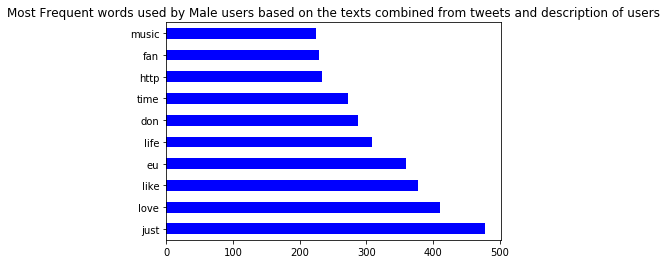

In [31]:
cvec.fit(male['all_text'])

male_df = pd.DataFrame(cvec.transform(male['all_text']).todense(),
                      columns = cvec.get_feature_names())
male_word_counts = male_df.sum(axis=0)
male_word_counts.sort_values(ascending=False).head(20)
male_word_counts.sort_values(ascending= False).head(10).plot(kind = 'barh', 
                                                             title = 'Most Frequent words used by Male users based on the texts combined from tweets and description of users',color= 'blue')

#### Plotting the graph of the most frequent words used by Male gender based on the profile description of the user

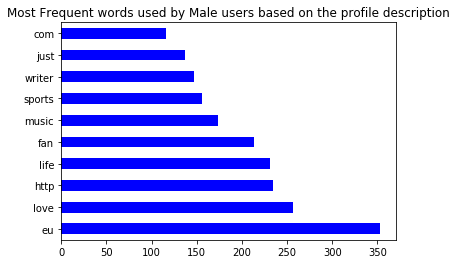

In [32]:

male_df_desc = pd.DataFrame(cvec.transform(male['desc_normalized']).todense(),
                      columns = cvec.get_feature_names())
male_word_counts_desc = male_df_desc.sum(axis=0)
male_word_counts_desc.sort_values(ascending=False).head(20)
male_word_counts_desc.sort_values(ascending= False).head(10).plot(kind = 'barh', 
                                                             title = 'Most Frequent words used by Male users based on the profile description', color = 'blue')

#### Plotting the graph of the most frequent words used by Male gender based on the tweets posted by the user

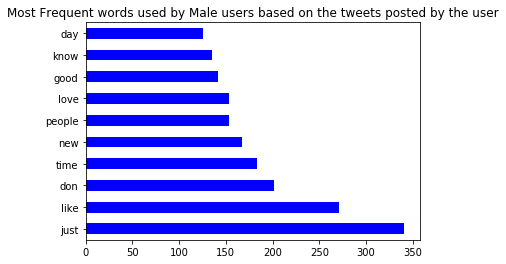

In [33]:
cvec.fit(male['text_normalized'])

male_df_text = pd.DataFrame(cvec.transform(male['text_normalized']).todense(),
                      columns = cvec.get_feature_names())
male_word_counts_text = male_df_text.sum(axis=0)
male_word_counts_text.sort_values(ascending=False).head(20)
male_word_counts_text.sort_values(ascending= False).head(10).plot(kind = 'barh', 
                                                             title = 'Most Frequent words used by Male users based on the tweets posted by the user', color = 'blue')

### Gender: Female

#### Plotting the graph of the most frequent words used by Female gender based on the all_text

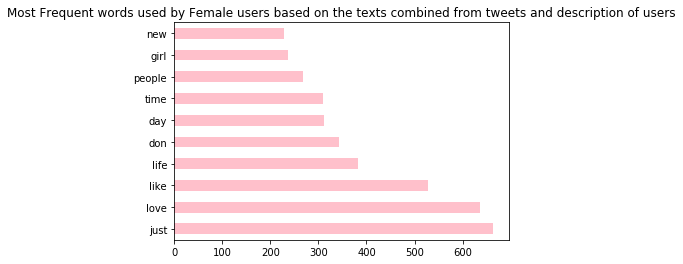

In [34]:
cvec.fit(female['all_text'])

female_df = pd.DataFrame(cvec.transform(female['all_text']).todense(),
                      columns = cvec.get_feature_names())
female_word_counts = female_df.sum(axis=0)
female_word_counts.sort_values(ascending=False).head(20)
female_word_counts.sort_values(ascending= False).head(10).plot(kind = 'barh', 
                                                             title = 'Most Frequent words used by Female users based on the texts combined from tweets and description of users', color = 'pink')

#### Plotting the graph of the most frequent words used by Female gender based on the profile description of the user

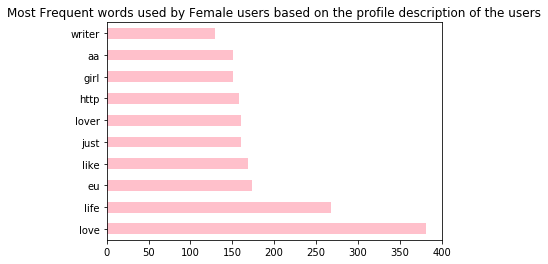

In [35]:
cvec.fit(female['desc_normalized'])

female_df_desc = pd.DataFrame(cvec.transform(female['desc_normalized']).todense(),
                      columns = cvec.get_feature_names())
female_word_counts_desc = female_df_desc.sum(axis=0)
female_word_counts_desc.sort_values(ascending=False).head(20)
female_word_counts_desc.sort_values(ascending= False).head(10).plot(kind = 'barh', 
                                                             title = 'Most Frequent words used by Female users based on the profile description of the users', color = 'pink')

#### Plotting the graph of the most frequent words used by Female gender based on the tweets posted by the user

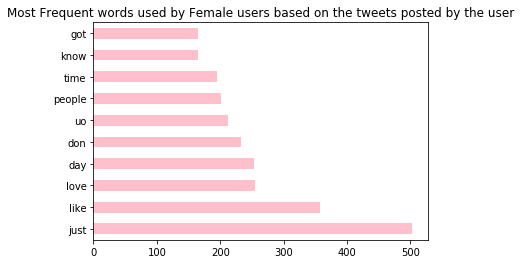

In [36]:
cvec.fit(female['text_normalized'])

female_df_text = pd.DataFrame(cvec.transform(female['text_normalized']).todense(),
                      columns = cvec.get_feature_names())
female_word_counts_text = female_df_text.sum(axis=0)
female_word_counts_text.sort_values(ascending=False).head(20)
female_word_counts_text.sort_values(ascending= False).head(10).plot(kind = 'barh', 
                                                             title = 'Most Frequent words used by Female users based on the tweets posted by the user', color= 'pink')

### Gender: Brand

#### Plotting the graph of the most frequent words used by Brand based on the all_text

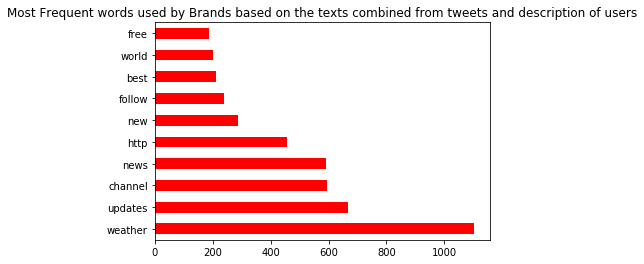

In [37]:
cvec.fit(brand['all_text'])

brand_df = pd.DataFrame(cvec.transform(brand['all_text']).todense(),
                      columns = cvec.get_feature_names())
brand_word_counts = brand_df.sum(axis=0)
brand_word_counts.sort_values(ascending=False).head(20)
brand_word_counts.sort_values(ascending= False).head(10).plot(kind = 'barh', 
                                                             title = 'Most Frequent words used by Brands based on the texts combined from tweets and description of users', color = 'red')

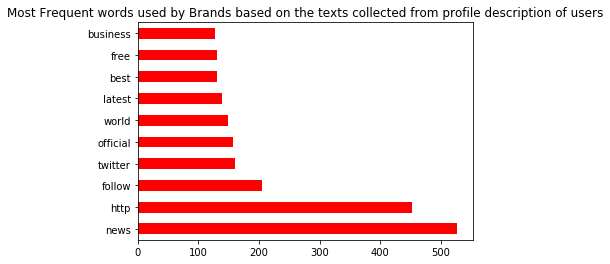

In [38]:
cvec.fit(brand['desc_normalized'])

brand_df_desc = pd.DataFrame(cvec.transform(brand['desc_normalized']).todense(),
                      columns = cvec.get_feature_names())
brand_word_counts_desc = brand_df_desc.sum(axis=0)
brand_word_counts_desc.sort_values(ascending=False).head(20)
brand_word_counts_desc.sort_values(ascending= False).head(10).plot(kind = 'barh', 
                                                             title = 'Most Frequent words used by Brands based on the texts collected from profile description of users', color = 'red')

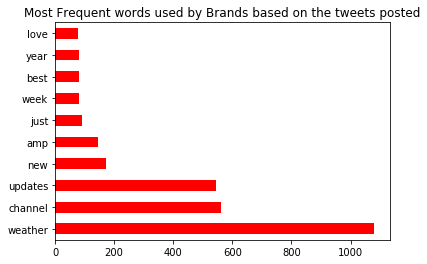

In [39]:
cvec.fit(brand['text_normalized'])

brand_df_text = pd.DataFrame(cvec.transform(brand['text_normalized']).todense(),
                      columns = cvec.get_feature_names())
brand_word_counts_text = brand_df_text.sum(axis=0)
brand_word_counts_text.sort_values(ascending=False).head(20)
brand_word_counts_text.sort_values(ascending= False).head(10).plot(kind = 'barh', 
                                                             title = 'Most Frequent words used by Brands based on the tweets posted', color= 'red')

<b>Observations:</b>

<ol>
<li>The results from the text features exploration are not quite conclusive when compared with results obtained from the colors features exploration.</li>
<li>Most used words used by male and female gender, are very similar words such as "just", "like", "love" which this does not give us any information about the gender really.</li>
<li>Brands tends to use the words "weather", "channel" and "news" more than regular male and female users. This means that we have probably many information or weather channels accounts in our dataset. Also, the usage of the word "http" decribes that brands tend to post more links than standard users.</li>
</ol>

<b> So, at the end of this section we are able to answer few questions on our dataset. For instance:</b><hr>
    
       1. What are the most used words by each gender category on the tweets posted?
        Males:
            1. just
            2. like
            3. don't
        
        Females:
            1. just
            2. like
            3. love
        
        Brands:
            1. weather
            2. channel
            3. updates
        
        2. Which color is most used for links and sidebars by each gender category?
        Links:
            1. Male - Olive
            2. Female - Amethyst
            3. Brand - Curoius Blue
        
        Sidebars:
            1. Male - Woodsmoke
            2. Female - Tradewind
            3. Brand - Algae Green
  

## Data Modeling

We will use machine learning algorithms to predict the user's gender based on color features and text features. For the data modelling phase of the project, we will perform below steps:

<ol>
    <li>Creating dummy variables for gender attribute in the dataset.</li>
    <li>Splitting data into training and test set by using 70:30</li>
    <li>I will run following models on the training data and predicting on the test data</li><ul>
    <li>SVC()</li>
    <li>KNeighborsClassifier()</li>
    <li>RandomForestClassifier()</li>
    <li>LogisticRegression()</li>
    <li>MultinomialNB()</li>
    </ul>
<li>Evaluate model based on Accuracy.</li>
</ol>

In [40]:
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [52]:
# following models will be used to train our dataset
models = [linear_model.LogisticRegression(),
          KNeighborsClassifier(),
          SVC()]

In [53]:
# eval_model function trains the classifier using training dataset, predicts on test set and returns accuracy for the model on the test.
def eval_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = model.score(x_test,y_test)
    return acc

In [54]:
# Defining a function for tokenization where I am removing the stopwords and unicodes from the tokens
def bag_of_words_cal(text):
    vectorizer = CountVectorizer(stop_words='english',
                                  strip_accents = 'unicode')
    vectors = vectorizer.fit_transform(text)
    #vocabulary = vectorizer.get_feature_names()
    return vectors#, vocabulary

### A. Evaluating the relationship between link_color and user's gender

In [55]:
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Using feature link_color as we saw from the visualizations that users tend to change link_color more than the sidebar color
df_col = df.loc[:, ['gender:confidence', 'gender', 'link_color']]#, 'sidebar_color']]

# Selecting rows where gender:confidence >= 1 and removing values like 7.60E+42
dfcolFiltered = df_col[(df_col['gender:confidence'] >= 1) & ((df_col['link_color']).str.contains('E\+') != True)]

bow = bag_of_words_cal(dfcolFiltered['link_color'])
X = bow
 
y = LabelEncoder().fit_transform(dfcolFiltered['gender'])

# Listing the classifiers I want to test the data on

In [56]:
X.shape

(13900, 2290)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = y,
                                                    random_state = 123)

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9730, 2290)
(4170, 2290)
(9730,)
(4170,)


#### Baseline Model - link_color

Calculating the baseline model by predicting the most frequently occuring gender class in the dataset.

In [63]:
from cytoolz import identity
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

base_model = make_pipeline(CountVectorizer(analyzer=identity), DummyClassifier('most_frequent'))     
base_score = cross_val_score(base_model,dfcolFiltered['link_color'], 
                             dfcolFiltered['gender'], cv=3, n_jobs=-1)

In [64]:
base_score.mean()

0.38546764186214433

The accuracy of baseline model is 38.54%

#### Results for link_color feature

In [65]:
#for ignoring future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

results_lc =  pd.Series([eval_model(model) for model in models], 
                     index = ['logit', 'knn', 'svc'])

In [66]:
print(results_lc)

logit    0.435731
knn      0.410552
svc      0.385372
dtype: float64


It seems that Logistic Regression model is performing better when link_color feature is used to predict the gender.

#### Plotting the bar plot for accuracies obtained for link_color feature

In [68]:
mse_model = []
acc_model = []
for i in range(3):
    acc = results_lc[i]
    acc_model.append(acc)

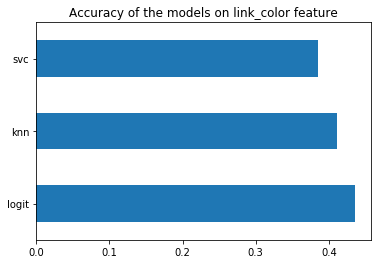

In [69]:
acc_model = pd.Series(acc_model, index = ['logit', 'knn', 'svc'])
acc_model.plot(kind = 'barh', title = 'Accuracy of the models on link_color feature')

### B. Evaluating the relationship between sidebar_color and user's gender

In [71]:
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn.pipeline import make_pipeline

df_col = df.loc[:, ['gender:confidence', 'gender', 'sidebar_color']]

# Selecting rows where gender:confidence >= 1 and removing values like 7.60E+42
dfcolFiltered = df_col[(df_col['gender:confidence'] >= 1) & ((df_col['sidebar_color']).str.contains('E\+') != True)]

# splitting data into X and y

bow = bag_of_words_cal(dfcolFiltered['sidebar_color'])
X = bow

y = LabelEncoder().fit_transform(dfcolFiltered['gender'])

# Listing the classifiers I want to test the data on

In [72]:
X.shape

(13920, 473)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = y,
                                                    random_state = 123)

In [74]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9744, 473)
(4176, 473)
(9744,)
(4176,)


#### Baseline Model - sidebar_color

Calculating the baseline model by predicting the most frequently occuring gender class in the dataset.

In [77]:
base_model = make_pipeline(CountVectorizer(analyzer=identity), DummyClassifier('most_frequent'))     
base_score = cross_val_score(base_model,dfcolFiltered['sidebar_color'], 
                             dfcolFiltered['gender'], cv=3, n_jobs=-1)

In [78]:
base_score.mean()

0.385273005256279

The accuracy of baseline model is 38.52%

#### Results for sidebar_color feature

In [79]:
results_sc =  pd.Series([eval_model(model) for model in models], 
                     index = ['logit', 'knn', 'svc'])

In [80]:
print(results_sc)

logit    0.410920
knn      0.349856
svc      0.385297
dtype: float64


It seems that Logistic Regression model is performing better again when sidebar_color feature is used to predict the gender.

#### Plotting the bar plot for accuracies obtained for sidebar_color feature

In [87]:
mse_model = []
acc_model = []
for i in range(3):
    acc = results_sc[i]
    acc_model.append(acc)

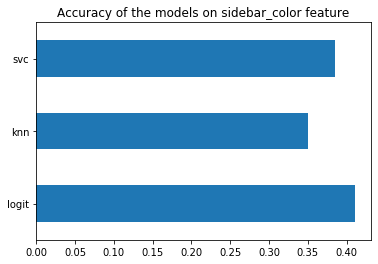

In [89]:
acc_model = pd.Series(acc_model, index = ['logit', 'knn', 'svc'])
acc_model.plot(kind = 'barh', title = 'Accuracy of the models on sidebar_color feature')

<b>Conclusion:</b> It can be observed that all the models yield approximately the same accuracy around 30-42% for both the link_color and sidebar_color features. 41% is not significant improvement in prediction of user's gender since baseline model is predicting with 38% accuracy.

Hence, I would explore texts of the user to see if the texts are providing better results

### How well does tweets and profile descriptions predict users gender?

In [90]:
dfTextmod = dfText

### A. Considering only the description text collected from user's profile

In [91]:
bow = bag_of_words_cal(dfTextmod['desc_normalized'])
X = bow

y = LabelEncoder().fit_transform(dfTextmod['gender'])

#### Baseline Model

In [92]:
from cytoolz import identity
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

base_model_t = make_pipeline(CountVectorizer(analyzer=identity), DummyClassifier('most_frequent'))     
base_score_t = cross_val_score(base_model, dfTextmod['desc_normalized'], dfTextmod['gender'], cv=5, n_jobs=-1)

In [93]:
base_score_t.mean()

0.38880035413583325

The accuracy of baseline model is 38.88%

#### Results for description feature used for predicting user gender

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = y,
                                                    random_state = 123)

In [97]:
results_dtext =  pd.Series([eval_model(model) for model in models], 
                     index = ['logit', 'knn', 'svc'])

In [98]:
print(results_dtext)

logit    0.618783
knn      0.448093
svc      0.388701
dtype: float64


Logistic Regression model is performing better with 61.87% accuracy

#### Plotting the accuracy barplot

In [101]:
mse_model_text = []
acc_model_text = []
for i in range(3):
    acc = results_dtext[i]
    acc_model_text.append(acc)

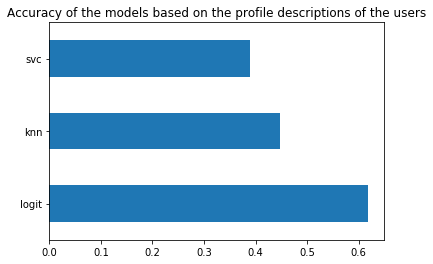

In [102]:
acc_model_text = pd.Series(acc_model_text, index = ['logit', 'knn', 'svc'])
acc_model_text.plot(kind = 'barh', title = 'Accuracy of the models based on the profile descriptions of the users')

### B. Considering only the Tweets text posted by the user

In [103]:
bow = bag_of_words_cal(dfTextmod['text_normalized'])
X = bow
### B. Considering only the Tweets text posted by the user
y = LabelEncoder().fit_transform(dfTextmod['gender'])

#### Baseline Model

In [105]:
from cytoolz import identity
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
base_model_t = make_pipeline(CountVectorizer(analyzer=identity), DummyClassifier('most_frequent'))     
base_score_t = cross_val_score(base_model, dfTextmod['text_normalized'], dfTextmod['gender'], cv=5, n_jobs=-1)

In [106]:
base_score_t.mean()

0.38880035413583325

The baseline model is performing with 38.88% accuracy

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = y,
                                                    random_state = 123)

#### Results for tweets feature used for predicting user gender

In [108]:
results_text =  pd.Series([eval_model(model) for model in models], 
                     index = ['logit', 'knn', 'svc'])

In [109]:
print(results_text)

logit    0.534283
knn      0.412603
svc      0.388701
dtype: float64


Logistic Regression is performing better with 53.42% accuracy.

#### Plotting bar plot for accuracy

In [110]:
mse_model_text = []
acc_model_text = []
for i in range(3):
    acc = results_text[i]
    acc_model_text.append(acc)

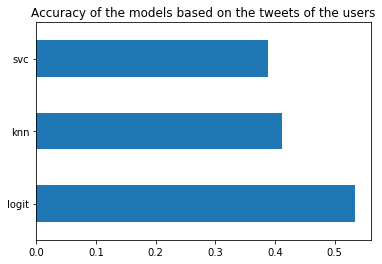

In [112]:
acc_model_text = pd.Series(acc_model_text, index = ['logit', 'knn', 'svc'])
acc_model_text.plot(kind = 'barh', title = 'Accuracy of the models based on the tweets of the users')

### C. Combining both description and tweets text together to evaluate the impact

In [114]:
bow = bag_of_words_cal(dfTextmod['all_text'])
X = bow

y = LabelEncoder().fit_transform(dfTextmod['gender'])

#### Baseline Model

In [115]:
from cytoolz import identity
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
base_model_t = make_pipeline(CountVectorizer(analyzer=identity), DummyClassifier('most_frequent'))     
base_score_t = cross_val_score(base_model, dfTextmod['all_text'], dfTextmod['gender'], cv=5, n_jobs=-1)

In [116]:
base_score_t.mean()

0.38880035413583325

The accuracy of baseline model after combining texts of both the profile description and tweets is 38.88%

In [117]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = y,
                                                    random_state = 123)

#### Results for both the text (tweet and profile description)

In [118]:
results_text =  pd.Series([eval_model(model) for model in models], 
                     index = ['logit', 'knn', 'svc'])

In [119]:
print(results_text)

logit    0.656929
knn      0.443023
svc      0.388701
dtype: float64


Logistic Regression is performing best with 65.69% accuracy

#### Plotting bar plot for accuracy

In [120]:
mse_model_text = []
acc_model_text = []
for i in range(3):
    acc = results_text[i]
    acc_model_text.append(acc)

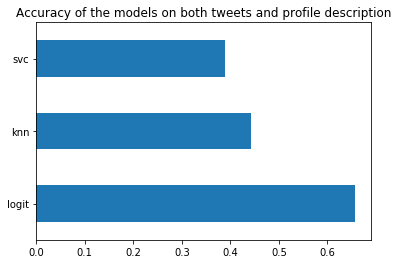

In [121]:
acc_model_text = pd.Series(acc_model_text, index = ['logit', 'knn', 'svc'])
acc_model_text.plot(kind = 'barh', title = 'Accuracy of the models on both tweets and profile description')

## Conclusion:

<ol>
    <li>Logistic Regression is performing best in predicting gender of the users among the three models.</li>
    <li>Combining texts from tweet and profile description yeilds better accuracy when compared to considering text from each separately.</li>
    <li>Text feature is better in predicting users' gender when compared to color features</li>
</ol>